In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)
# sys.path.append(os.getcwd())

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

df['Targ'] = df['MAR'] > 3.5
data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient', 'MAR']]



In [3]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_wolnet_MAR')

analyzer.run()

Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['patient', 'OAR', 'Targ']

Continuous: ['VolDice', 'FNPL', 'FNV', 'MAR', 'SurfDist', 'JaccardIndex', '95HD', 'APL']

Config file not found, checking for outliers in categorical variables...
  - Outliers found in patient: ['RADCURE-3521: 2 out of 380', 'RADCURE-3689: 2 out of 380', 'RADCURE-3929: 2 out of 380', 'RADCURE-3425: 2 out of 380', 'RADCURE-2976: 2 out of 380', 'RADCURE-3698: 2 out of 380']
  - No Outliers found in OAR
  - No Outliers found in Targ
Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ VolDice, 

In [4]:
import yaml
import pprint

with open('analysis_wolnet_MAR/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print('Config File Before:\n')
pprint.pprint(config)

# Move 'patient' from categorical to other
config['columns']['categorical'].remove('patient')
config['columns']['other'].append('patient')

# Remove 'patient' from mapping
del config['mapping']['patient']

# Remove 'patient' from categorical in missingness_strategy
del config['missingness_strategy']['categorical']['patient']

print('\nConfig File After:\n')
pprint.pprint(config)

with open('analysis_wolnet_MAR/config.yaml', 'w') as outfile:
    yaml.dump(config, outfile)

Config File Before:

{'columns': {'categorical': ['patient', 'OAR', 'Targ'],
             'continuous': ['VolDice',
                            'FNPL',
                            'FNV',
                            'MAR',
                            'SurfDist',
                            'JaccardIndex',
                            '95HD',
                            'APL'],
             'date': [],
             'other': []},
 'mapping': {'OAR': {'Acoustic_L': 'Acoustic_L',
                     'Acoustic_R': 'Acoustic_R',
                     'BrachialPlex_L': 'BrachialPlex_L',
                     'BrachialPlex_R': 'BrachialPlex_R',
                     'Brainstem': 'Brainstem',
                     'Esophagus': 'Esophagus',
                     'Eye_L': 'Eye_L',
                     'Eye_R': 'Eye_R',
                     'Larynx': 'Larynx',
                     'Lens_L': 'Lens_L',
                     'Lens_R': 'Lens_R',
                     'Lips': 'Lips',
                     'Mand

In [5]:
analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_wolnet_MAR_updated', config_file='./analysis_wolnet_MAR/config.yaml')

analyzer.run()

Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ VolDice, mean (SD)      │                │ 0         │ 0.8 (0.1)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ FNPL, mean (SD)         │                │ 0         │ 675.6 (861.7)   │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ FNV, mean (SD)          │                │ 0         │ 793.0 (1199.9)  │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ MAR, mean (SD)          │                │ 0         │ 3.7 (0.7)       │
├─────────────────────────┼────────────────┼───────────┼──────

Applying mrmr for feature reduction


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 103.83it/s]
No path specified. Models will be saved in: "AutogluonModels/ag-20240820_203703"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #210-Ubuntu SMP Fri Jul 5 17:03:38 UTC 2024
CPU Count:          4
Memory Avail:       1.24 GB / 7.61 GB (16.3%)
Disk Space Avail:   526.11 GB / 915.32 GB (57.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast 

Features kept: ['APL' 'VolDice']


	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 1 | ['VolDice']
		('int', [])   : 1 | ['APL']
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 1 | ['VolDice']
		('int', [])   : 1 | ['APL']
	0.0s = Fit runtime
	2 features in original data used to generate 2 features in processed data.
	Train Data (Processed) Memory Usage: 0.00 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.05s ...
AutoGluon will gauge predictive performance using evaluation metric: 'roc_auc'
	This metric expects predicted probabilities rather than predicted class labels, so you'll need to use predict_proba() instead of predict()
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 243, Val Rows: 61
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix'


Model Leaderbord
----------------
╒════╤═════════════════════╤═════════════╤═══════════════╕
│    │ model               │   score_val │ eval_metric   │
╞════╪═════════════════════╪═════════════╪═══════════════╡
│  0 │ WeightedEnsemble_L2 │    0.724444 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  1 │ KNeighborsUnif      │    0.708889 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  2 │ RandomForestEntr    │    0.685556 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  3 │ RandomForestGini    │    0.682222 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  4 │ CatBoost            │    0.676667 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  5 │ ExtraTreesEntr      │    0.676667 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  6 │ ExtraTreesGini      │    0.675556 │ roc_auc       │
├────┼───────────────

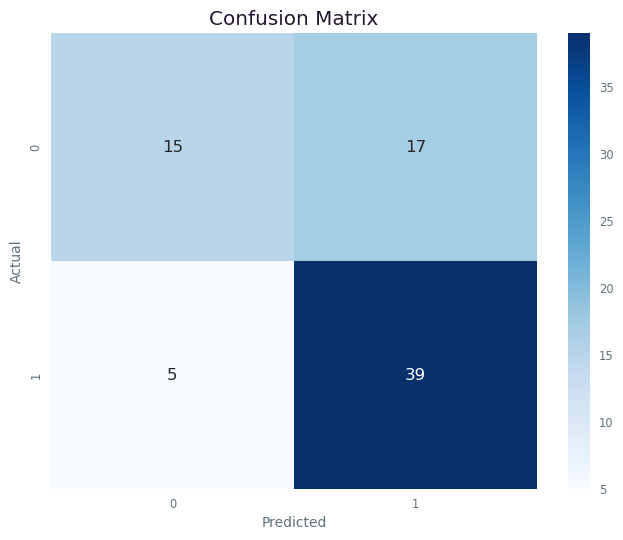

Computing feature importance via permutation shuffling for 2 features using 76 rows with 5 shuffle sets...
	0.55s	= Expected runtime (0.11s per shuffle set)
	0.26s	= Actual runtime (Completed 5 of 5 shuffle sets)


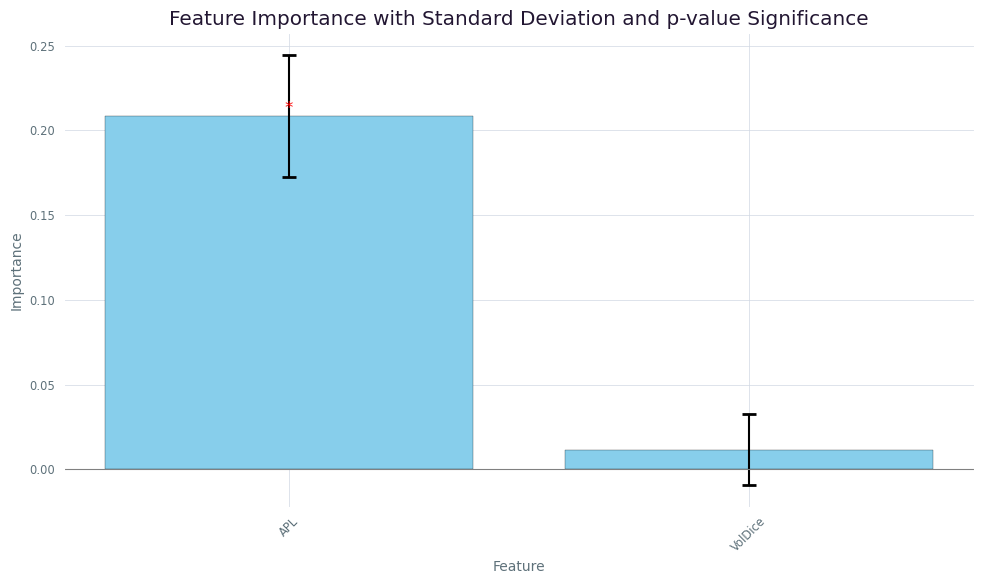

<class 'pandas.core.frame.DataFrame'>
Provided model function fails when applied to the provided data set.


TypeError: data must be TabularDataset or pandas.DataFrame or str file path to data

In [6]:
from AutoML.trainer import AutoMLSupervised

trainer = AutoMLSupervised(task='binary', reduction_method='mrmr', output_dir='./analysis_wolnet_MAR_updated')
trainer.run(data, 'Targ', exclude=['OAR', 'patient', 'MAR'], stratify_on='OAR')

In [15]:
import shap

class ModelWrapper:
    def __init__(self, predictor, feature_names, target_variable=None):
        self.ag_model = predictor
        self.feature_names = feature_names
        self.target_variable = target_variable
        if target_variable is None and predictor.problem_type != 'regression':
            print("Since target_class not specified, SHAP will explain predictions for each class")
    
    def predict_proba(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        preds = self.ag_model.predict_proba(X)
        if self.ag_model.problem_type == "regression" or self.target_variable is None:
            return preds
        else:
            return preds[self.target_variable]  
            
class AutoMLExplainer2():
    def __init__(self, 
                 predictor, 
                 X_train,
                 X_test,
                 y_test,
                 output_dir='.'):
        
        self.predictor = ModelWrapper(predictor.predictor, predictor.feature_names, predictor.target_variable)
        self.X_train = X_train
        self.X_test = X_test
        self.y_test = y_test
        self.output_dir = output_dir

    def _plot_feature_importance(self):
        """
        Plots the feature importance with standard deviation and p-value significance.
        """
        df = self.predictor.feature_importance(pd.concat([self.X_test, self.y_test], axis=1))

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 6))

        # Adding bar plot with error bars
        bars = ax.bar(df.index, df['importance'], yerr=df['stddev'], capsize=5, color='skyblue', edgecolor='black')

        # Adding p_value significance indication
        for i, (bar, p_value) in enumerate(zip(bars, df['p_value'])):
            height = bar.get_height()
            significance = '*' if p_value < 0.05 else ''
            ax.text(bar.get_x() + bar.get_width() / 2.0, height, significance, ha='center', va='bottom', fontsize=12, color='red')

        # Labels and title
        ax.set_xlabel('Feature')
        ax.set_ylabel('Importance')
        ax.set_title('Feature Importance with Standard Deviation and p-value Significance')
        ax.axhline(0, color='grey', linewidth=0.8)
        ax.set_xticks(np.arange(len(df.index.values)))
        ax.set_xticklabels(df.index.values, rotation=45)

        # Show plot
        plt.tight_layout()
        plt.show()

    def shap_values(self):

        print(type(self.X_test))
        shap_exp = shap.KernelExplainer(self.predictor.predict_proba, self.X_train)
        
        NSHAP_SAMPLES = 100 

        self.shap_values = shap_exp.shap_values(self.X_test, nsamples=NSHAP_SAMPLES)
        shap.summary_plot(self.shap_values, self.X_test)
        shap.dependence_plot("Education-Num", self.shap_values, self.X_test)
        plt.show()

    def lime_values(self):
        pass

    def run(self):
            
        # Plot diagnostics
            try:
                if self.predictor.problem_type == 'binary':
                    plot_classification_diagnostics(self.y_test, self.predictor.predict_proba(self.X_test).iloc[:, 1], self.output_dir)
                elif self.predictor.problem_type == 'regression':
                    plot_regression_diagnostics(self.y_test, self.predictor.predict(self.X_test, as_pandas=False))
            except Exception as e:
                print(f"Error in plotting diagnostics: {e}")

            # Plot feature importance
            try:
                self._plot_feature_importance()
            except Exception as e:
                print(f"Error in plotting feature importance: {e}")

            self.shap_values()


    @classmethod
    def from_trainer(cls, trainer):
        return cls(trainer, trainer.X_train, trainer.X_test, trainer.y_test, trainer.output_dir)

# trainer.target_class = 
explainer = AutoMLExplainer2.from_trainer(trainer)
explainer.run()

Error in plotting diagnostics: 'ModelWrapper' object has no attribute 'problem_type'
Error in plotting feature importance: 'ModelWrapper' object has no attribute 'feature_importance'
<class 'pandas.core.frame.DataFrame'>
Provided model function fails when applied to the provided data set.


KeyError: 'Targ'